In [2]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
pf = pd.read_csv("Ecommerce Customers")

In [8]:
pf.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [10]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [12]:
pf.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

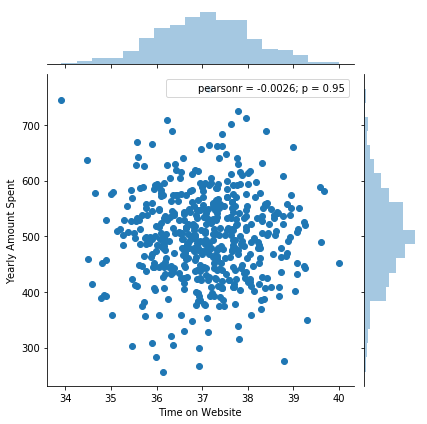

In [13]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent', data=pf, kind='scatter')

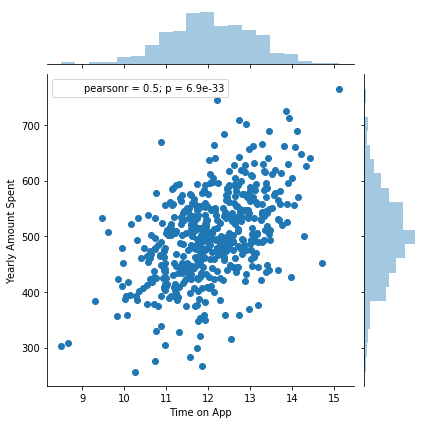

In [14]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent', data=pf, kind='scatter')

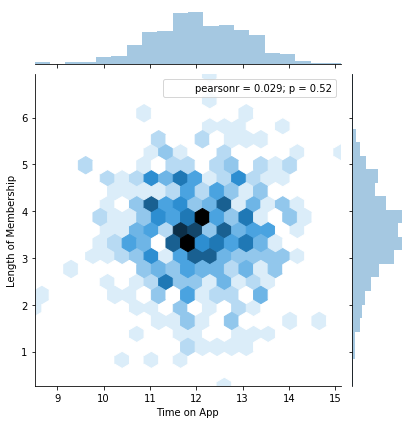

In [15]:
sns.jointplot(x='Time on App',y='Length of Membership',data=pf,kind='hex')

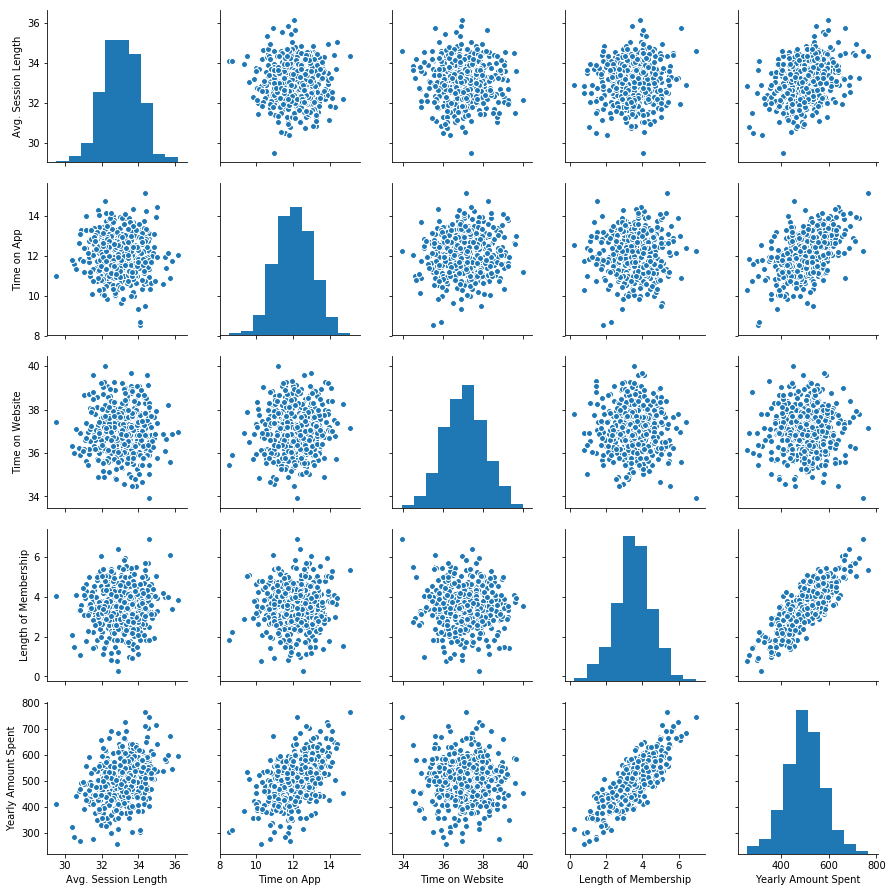

In [16]:
sns.pairplot(pf)

SPLIT THE DATA SET INTO TRAINING AND TEST

In [17]:
pf.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [19]:
X = pf[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [20]:
y = pf['Yearly Amount Spent']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

TRAINING THE DATA SET

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
lm.coef_

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

In [29]:
predictions = lm.predict(X_test)

In [30]:
predictions

array([ 456.44186104,  402.72005312,  409.2531539 ,  591.4310343 ,
        590.01437275,  548.82396607,  577.59737969,  715.44428115,
        473.7893446 ,  545.9211364 ,  337.8580314 ,  500.38506697,
        552.93478041,  409.6038964 ,  765.52590754,  545.83973731,
        693.25969124,  507.32416226,  573.10533175,  573.2076631 ,
        397.44989709,  555.0985107 ,  458.19868141,  482.66899911,
        559.2655959 ,  413.00946082,  532.25727408,  377.65464817,
        535.0209653 ,  447.80070905,  595.54339577,  667.14347072,
        511.96042791,  573.30433971,  505.02260887,  565.30254655,
        460.38785393,  449.74727868,  422.87193429,  456.55615271,
        598.10493696,  449.64517443,  615.34948995,  511.88078685,
        504.37568058,  515.95249276,  568.64597718,  551.61444684,
        356.5552241 ,  464.9759817 ,  481.66007708,  534.2220025 ,
        256.28674001,  505.30810714,  520.01844434,  315.0298707 ,
        501.98080155,  387.03842642,  472.97419543,  432.87046

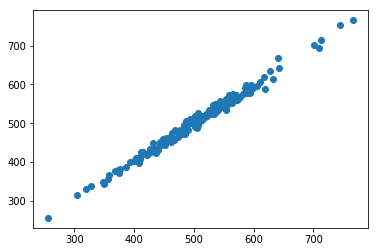

In [31]:
plt.scatter(y_test, predictions)

In [32]:
from sklearn import metrics

In [33]:
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 7.22814865343
MSE 79.813051651
RMSE 8.93381506698


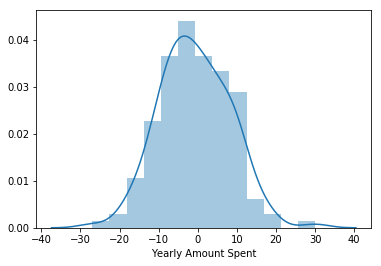

In [34]:
sns.distplot((y_test-predictions))

In [35]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [37]:
cpf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [38]:
cpf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
